Практическая часть

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

Задача: предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

3.0


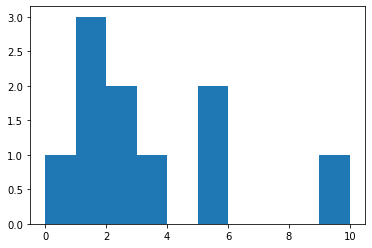

In [9]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


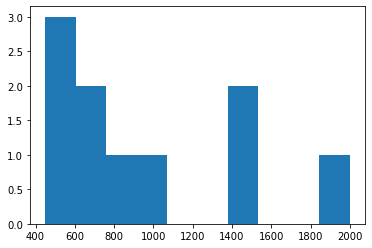

In [10]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [11]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [12]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


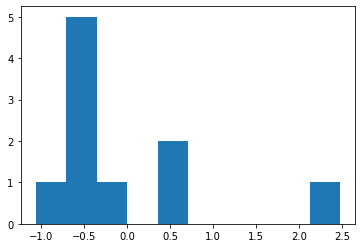

In [13]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


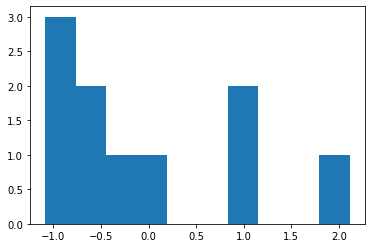

In [14]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
W = np.random.randn(X.shape[1])
W

array([ 1.1291768 , -1.12403288,  2.21385428, -0.06715209])

In [17]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [0.78179865 0.20376327 1.80720672 0.31004264], error 3358.7020230068388
Iter: 500, weights: [56.49771422  5.83490058  1.46826045  5.15139967], error 25.477780828769745
Iter: 1000, weights: [56.49999991  6.16437321  0.29101695  6.04151114], error 24.978344736184187
Iter: 1500, weights: [56.5         6.25468719 -0.12383959  6.37975688], error 24.914169255898088
Iter: 2000, weights: [56.5         6.28574808 -0.27270922  6.50241932], error 24.905856200574274
Iter: 2500, weights: [56.5         6.29685415 -0.32627033  6.54661738], error 24.904779181988367
Iter: 3000, weights: [56.5         6.3008479  -0.345548    6.56252849], error 24.904639645702265
Iter: 3500, weights: [56.5         6.30228522 -0.35248678  6.56825569], error 24.904621567670265
Iter: 4000, weights: [56.5         6.30280256 -0.35498433  6.57031715], error 24.9046192255179
Iter: 4500, weights: [56.5         6.30298877 -0.35588331  6.57105915], error 24.90461892207352
Final MSE: 24.904618882759898


array([56.5       ,  6.30305572, -0.35620651,  6.57132592])

In [19]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [20]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 3.90818208  1.15062754 -0.45336877 -0.61920812], error 2924.762663401708
Iter: 500, weights: [57.06099989  6.06666484 -0.72300281  6.91674162], error 25.320877284590598
Iter: 1000, weights: [57.05307445  6.1222516  -0.95884041  7.10935282], error 25.34780461598266
Iter: 1500, weights: [57.05251185  6.12615181 -0.97552283  7.12300724], error 25.35046362992875
Iter: 2000, weights: [57.05247203  6.12642785 -0.97670359  7.12397369], error 25.350655579347638
Iter: 2500, weights: [57.05246922  6.12644739 -0.97678716  7.12404209], error 25.35066918407879
Iter: 3000, weights: [57.05246902  6.12644877 -0.97679307  7.12404694], error 25.350670147100466
Iter: 3500, weights: [57.052469    6.12644887 -0.97679349  7.12404728], error 25.350670215262543
Iter: 4000, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.35067022008698
Iter: 4500, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.350670220428466
Final MSE: 25.35

array([57.052469  ,  6.12644888, -0.97679353,  7.1240473 ])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [21]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [22]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.4147314   2.40666444  1.36668678  2.03518119], error 3507.450058520227
Iter: 500, weights: [56.49717514  6.302321   -0.35425778  6.56979818], error 24.904627736162226
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646691708
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.90462764668883
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Final MSE: 24.904627646688827


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

In [23]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.37333934  1.05778183  2.79640889  1.99908311], error 3367.3921229457324
Iter: 500, weights: [56.5         6.30306154 -0.35623461  6.57134911], error 24.90461888127189
Iter: 1000, weights: [56.5         6.30309349 -0.35638884  6.57147642], error 24.90461887690839
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908398
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908373
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690839
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908398
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908373
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690839
Final MSE: 24.904618876908398


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

## Домашнее задание

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [26]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [27]:
n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]

In [28]:
coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

In [29]:
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

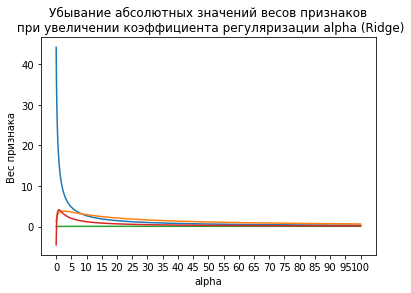

In [32]:
for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])
    plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
    plt.xticks(np.arange(0, 101, 5))
    plt.xlabel('alpha')
    plt.ylabel('Вес признака');

Вывод: При увеличении коэффицента регуляризации веса признаков стремятся к нулю. При уменьшении коэффициента регуляризации веса признаков стремятся к бесконечности.

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [37]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4,reg=1):
    W = np.random.random(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y)    
        dReg=reg * (W / abs(W))
        W -= eta * (dQ + dReg)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [38]:
W

array([ 1.1291768 , -1.12403288,  2.21385428, -0.06715209])

In [39]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-3,reg=0.1)

Iter: 0, weights: [1.03080445 0.90215376 0.34142395 0.6125201 ], error 3213.530786198737
Iter: 500, weights: [36.0828219   4.38489474  3.17835016  3.96558712], error 446.60020624102117
Iter: 1000, weights: [48.96483282  4.91842074  3.00706912  4.33753786], error 83.9192093226693
Iter: 1500, weights: [53.69911682  5.17401165  2.66173784  4.49913827], error 34.35933983911927
Iter: 2000, weights: [55.43901947  5.36299533  2.34377455  4.64809969], error 27.292718282956155
Iter: 2500, weights: [56.07845328  5.51186608  2.06208858  4.79463394], error 26.09324317451859
Iter: 3000, weights: [56.3134524   5.63078816  1.81250458  4.93660963], error 25.755164303866387
Iter: 3500, weights: [56.39981722  5.72669548  1.59073889  5.07204311], error 25.575679653739353
Iter: 4000, weights: [56.43155726  5.80476899  1.39317305  5.1997166 ], error 25.44645988715717
Iter: 4500, weights: [56.44322209  5.86892719  1.21677181  5.31900223], error 25.34523114672388
Final MSE: 25.264077603476075


array([56.44750405,  5.92204962,  1.05926892,  5.42947429])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Ответ: Нет.